In [ ]:
from SpectralClustering import SpectralClustering
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# This function visualizes filters in matrix A. Each column of A is a
# filter. We will reshape each column into a square image and visualizes
# on each cell of the visualization panel.
# All other parameters are optional, usually you do not need to worry
# about it.
# opt_normalize: whether we need to normalize the filter so that all of
# them can have similar contrast. Default value is true.
# opt_graycolor: whether we use gray as the heat map. Default is true.
# opt_colmajor: you can switch convention to row major for A. In that
# case, each row of A is a filter. Default value is false.
# source: https://github.com/tsaith/ufldl_tutorial

def display_network(A, m=-1, n=-1):
    opt_normalize = True
    opt_graycolor = True

    # Rescale
    A = A - np.average(A)

    # Compute rows & cols
    (row, col) = A.shape
    sz = int(np.ceil(np.sqrt(row)))
    buf = 1
    
    if m < 0 or n < 0:
        n = int(np.ceil(np.sqrt(col))) # Cast to int
        m = int(np.ceil(col / n))      # Cast to int

    dim_x = int(buf + m * (sz + buf))
    dim_y = int(buf + n * (sz + buf))
    image = np.ones(shape=(dim_x, dim_y))

    if not opt_graycolor:
        image *= 0.1

    k = 0

    for i in range(int(m)):
        for j in range(int(n)):
            if k >= col:
                continue

            clim = np.max(np.abs(A[:, k]))

            if opt_normalize:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / clim
            else:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / np.max(np.abs(A))
            k += 1

    return image

def display_color_network(A):
    """
    # display receptive field(s) or basis vector(s) for image patches
    #
    # A         the basis, with patches as column vectors

    # In case the midpoint is not set at 0, we shift it dynamically

    :param A:
    :param file:
    :return:
    """
    if np.min(A) >= 0:
        A = A - np.mean(A)

    cols = np.round(np.sqrt(A.shape[1]))

    channel_size = A.shape[0] / 3
    dim = np.sqrt(channel_size)
    dimp = dim + 1
    rows = np.ceil(A.shape[1] / cols)

    B = A[0:channel_size, :]
    C = A[channel_size:2 * channel_size, :]
    D = A[2 * channel_size:3 * channel_size, :]

    B = B / np.max(np.abs(B))
    C = C / np.max(np.abs(C))
    D = D / np.max(np.abs(D))

    # Initialization of the image
    image = np.ones(shape=(dim * rows + rows - 1, dim * cols + cols - 1, 3))

    for i in range(int(rows)):
        for j in range(int(cols)):
            # This sets the patch
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 0] = B[:, i * cols + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 1] = C[:, i * cols + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 2] = D[:, i * cols + j].reshape(dim, dim)

    image = (image + 1) / 2

    #PIL.Image.fromarray(np.uint8(image * 255), 'RGB').save(filename)

    return image

In [3]:
X_full, y_full = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X_full = X_full/255.0

X_sample, _, y_sample, _ = train_test_split(X_full, y_full, train_size=0.1, stratify=y_full, random_state=143)
print(f"Datasest shape: {X_sample.shape}")


Datasest shape: (7000, 784)


Datasest shape: (7000, 784)


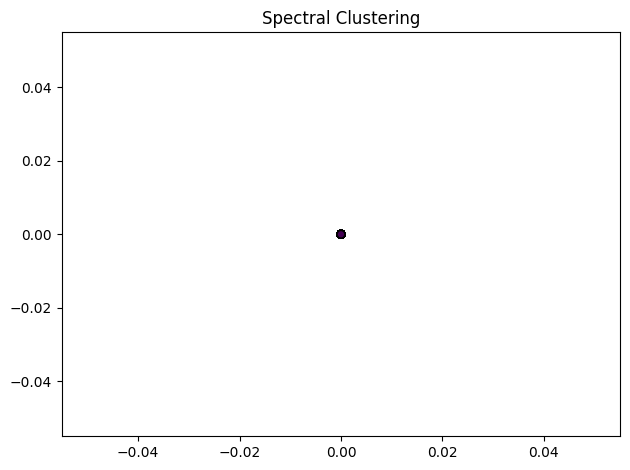

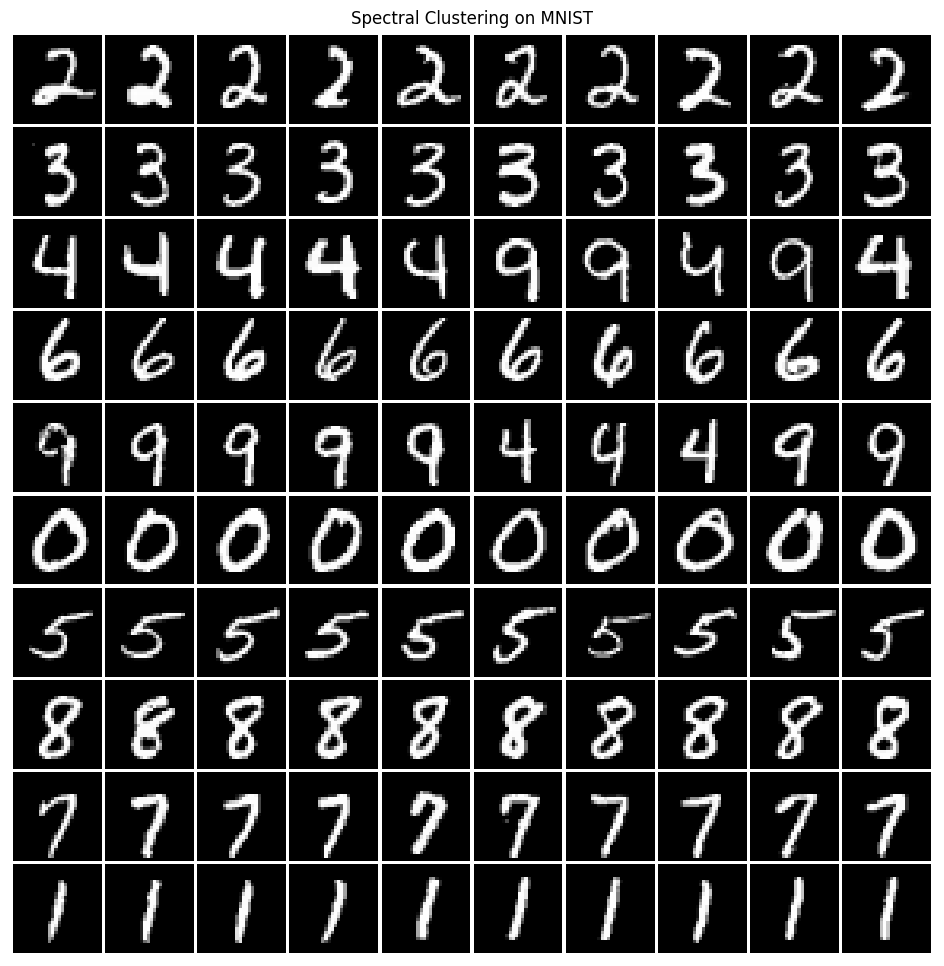

In [4]:
X_sample, _, y_sample, _ = train_test_split(X_full, y_full, train_size=0.1, stratify=y_full, random_state=143)
X_sample = np.asarray(X_sample)[:7000, :]
print(f"Datasest shape: {X_sample.shape}")

model = SpectralClustering(clusters=10, sigma=4.0, neighbors=20)
ans = model.fit_predict(X_sample)

samples_per_cluster = 10
sorted_images = []

for c in range(10): 
        cluster_indices = np.where(ans == c)[0]
        X_cluster = X_sample[cluster_indices]

        if len(X_cluster) == 0:
            continue

        centroid = np.mean(X_cluster, axis=0)
        dists = np.linalg.norm(X_cluster - centroid, axis=1)

        nearest_indices = np.argsort(dists)[:samples_per_cluster]
        
        sorted_images.append(X_cluster[nearest_indices])

grid_data = np.vstack(sorted_images)

viz_array = display_network(grid_data.T)
plt.figure(figsize=(12, 12))
plt.imshow(viz_array, cmap='gray')
plt.axis('off')
plt.title(f"Spectral Clustering on MNIST")
plt.show()

Datasest shape: (7000, 784)


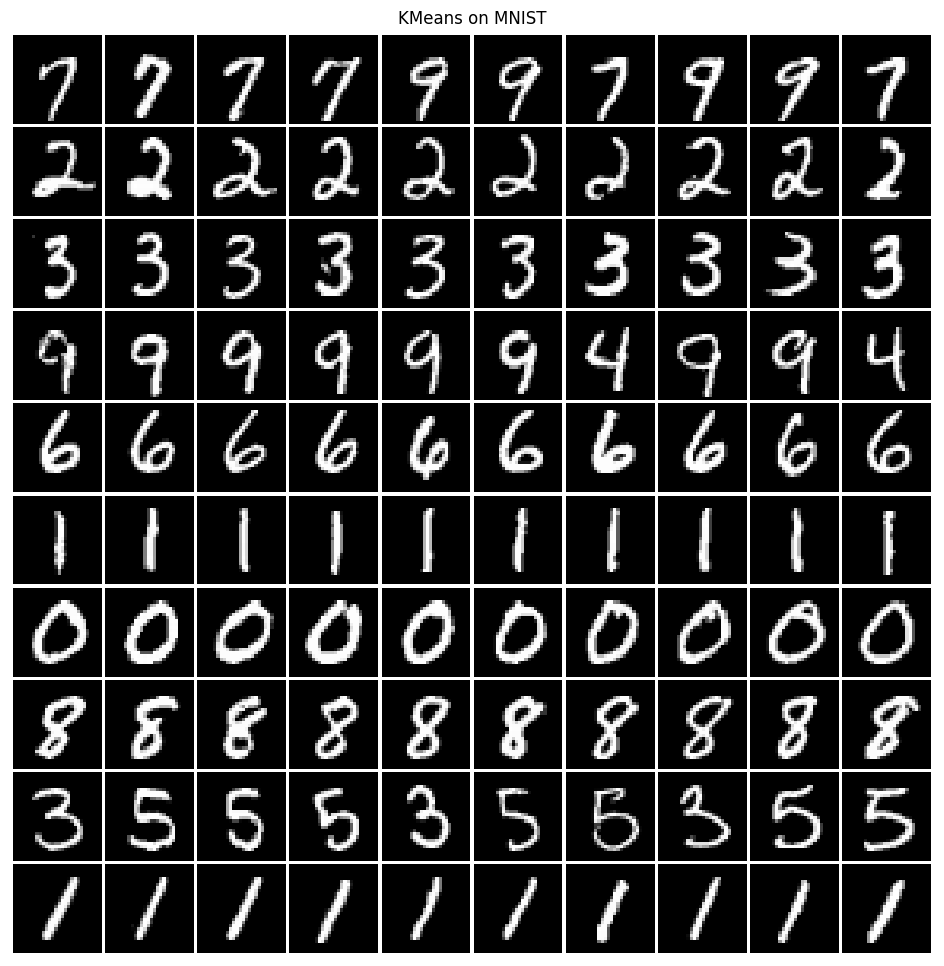

In [5]:
from sklearn.cluster import KMeans

X_sample, _, y_sample, _ = train_test_split(X_full, y_full, train_size=0.1, stratify=y_full, random_state=143)
X_sample = np.asarray(X_sample)[:7000, :]
print(f"Datasest shape: {X_sample.shape}")

model = KMeans(n_clusters=10)
ans = model.fit_predict(X_sample)

samples_per_cluster = 10
sorted_images = []

for c in range(10): 
        cluster_indices = np.where(ans == c)[0]
        X_cluster = X_sample[cluster_indices]

        if len(X_cluster) == 0:
            continue

        centroid = np.mean(X_cluster, axis=0)
        dists = np.linalg.norm(X_cluster - centroid, axis=1)

        nearest_indices = np.argsort(dists)[:samples_per_cluster]
        
        sorted_images.append(X_cluster[nearest_indices])

grid_data = np.vstack(sorted_images)

viz_array = display_network(grid_data.T)
plt.figure(figsize=(12, 12))
plt.imshow(viz_array, cmap='gray')
plt.axis('off')
plt.title(f"KMeans on MNIST")
plt.show()